In [1]:

!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [3]:
len = 100
x = np.arange(0, len)
y = x

(-1.0, 101.0)

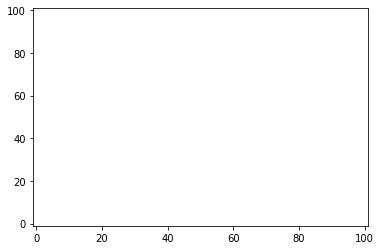

In [4]:
len = 100
fig = plt.figure()
plt.xlim(-1,len+1)
plt.ylim(-1,len+1)

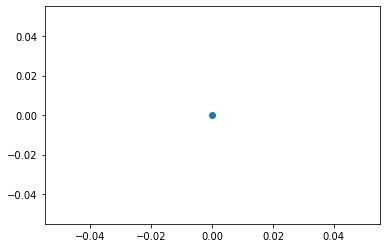

In [5]:
p, = plt.plot(x[0], y[0], "o")

In [6]:
def update(frame):
    print(frame)
    p.set_data((x[frame]+1)%len, (y[frame]+1)%len)
    return p,

def init():
    p.set_data(x[0], y[0])
    return  p,

In [7]:
ani = animation.FuncAnimation(fig=fig, 
							  func=update, 
							  init_func=init,  
							  frames=np.arange(0, len), 
							  interval=10)
plt.show()
ani.save('1.gif', fps=30)


MovieWriter stderr:
[gif @ 0x563faddde600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



0
1


CalledProcessError: ignored

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-c

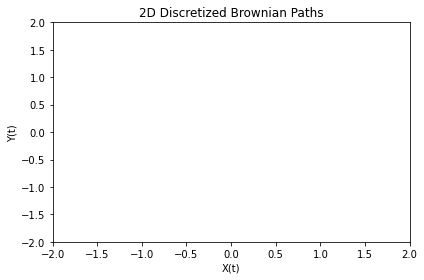

In [8]:
!apt install ffmpeg
!brew install imagemagick

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image # For GIF

rc('animation', html='html5')
np.random.seed(5)


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


def generateRandomLines(dt, N):
    dX = np.sqrt(dt) * np.random.randn(1, N)
    X = np.cumsum(dX, axis=1)

    dY = np.sqrt(dt) * np.random.randn(1, N)
    Y = np.cumsum(dY, axis=1)

    lineData = np.vstack((X, Y))

    return lineData


# Returns Line2D objects
def updateLines(num, dataLines, lines):
    for u, v in zip(lines, dataLines):
        u.set_data(v[0:2, :num])

    return lines

N = 501 # Number of points
T = 1.0
dt = T/(N-1)


fig, ax = plt.subplots()

data = [generateRandomLines(dt, N)]

ax = plt.axes(xlim=(-2.0, 2.0), ylim=(-2.0, 2.0))

ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_title('2D Discretized Brownian Paths')

## Create a list of line2D objects
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1])[0] for dat in data]


## Create the animation object
anim = animation.FuncAnimation(fig, updateLines, N+1, fargs=(data, lines), interval=30, repeat=True, blit=False)

plt.tight_layout()
plt.show()

# Save as GIF
anim.save('animationBrownianMotion2d.gif', writer='pillow', fps=60)

Image(url='animationBrownianMotion2d.gif')
## Uncomment to save the animation
#anim.save('brownian2d_1path.mp4', writer=writer)
